# Section 3 Series Methods and Handling

## 34. Reading data in .csv()

In [1]:
#https://andybek.com/pandas-drinks

In [2]:
import pandas as pd

In [3]:
pd.read_csv('drinks.csv')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [4]:
pd.read_csv('drinks.csv', usecols=['country','wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
alcohol = pd.read_csv('drinks.csv', usecols=['country','wine_servings'], index_col='country')

In [6]:
alcohol = alcohol.squeeze()

In [7]:
type(alcohol)

pandas.core.series.Series

## 35. Series Sizing With .size, .shape, And len()

In [8]:
alcohol.size

193

In [9]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [10]:
alcohol.shape

(193,)

In [11]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [12]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [13]:
alcohol.values.size == alcohol.index.size

True

In [14]:
alcohol.shape

(193,)

In [15]:
alcohol.size == alcohol.shape[0]

True

In [16]:
len(alcohol)

193

In [17]:
type(alcohol)

pandas.core.series.Series

## 36. Unique Values And Series Monotonicity

In [18]:
alcohol.is_unique

False

In [19]:
alcohol.head(5)

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [20]:
alcohol.head(5).is_unique

True

In [21]:
alcohol.nunique()

71

In [22]:
alcohol.nunique(dropna=False)

72

In [23]:
pd.Series([1,2,3,4,5]).is_monotonic_increasing

True

In [24]:
pd.Series([1,2,3,3,4,5,5,5,55,555]).is_monotonic_increasing

True

In [25]:
pd.Series([1,2,3,3,4,5,5,5,55,2]).is_monotonic_increasing

False

In [26]:
pd.Series(reversed([1,2,3,3,4,5,5,5,55])).is_monotonic_increasing

False

## 37. The count() method

In [27]:
alcohol.count() #not NaN

162

In [28]:
alcohol.size #all elements

193

In [29]:
alcohol.hasnans

True

## 38. Accessing And Counting NAs

In [30]:
alcohol.size

193

In [31]:
alcohol.count()

162

In [32]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [33]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [34]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [35]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [36]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [37]:
len(list(alcohol[alcohol.isnull()].index))

31

In [38]:
alcohol.isnull().sum()

31

In [39]:
sum([True, False, True])

2

In [40]:
all = alcohol.size
all

193

In [41]:
nonnulls = alcohol.count()
nonnulls

162

In [42]:
nulls = alcohol.isnull().sum()
nulls

31

In [43]:
nulls = alcohol.isna().sum()
nulls

31

In [44]:
all == nonnulls + nulls

True

## 39. BONUS: Another Approach

In [45]:
import numpy as np

In [46]:
np.isnan

<ufunc 'isnan'>

In [47]:
ser = pd.Series([True, False, None, 2], dtype='float')

In [48]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [49]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [50]:
alcohol[np.isnan]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [51]:
alcohol[np.isnan].size

31

## 40. The Other Side: notnull() And notna()

In [52]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [53]:
alcohol.notnull().sum()

162

In [54]:
alcohol.count()

162

## 41. BONUS: Booleans Are Literally Numbers In Python

In [55]:
#True  -- 1
#False -- 0

In [56]:
True + 19

20

In [57]:
True + False + True + True

3

In [58]:
type(True)

bool

In [59]:
type(False)

bool

In [60]:
alcohol.isnull().sum()

31

## 42. Skill Challenge

## 43. Solution

In [61]:
wine_servings = alcohol.loc[alcohol.notnull()]
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [62]:
wine_servings.sum()

8221.0

In [63]:
wine_servings[wine_servings < 100].sum()

2416.0

## 44. Dropping And Filling NAs

In [64]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [65]:
#reassignmet
#alcohol = alcohol.dropna()

In [66]:
#other way, inplace paramether
#alcohol.dropna(inplace=True)

In [67]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [68]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## 45. Descriptive Statistics

In [69]:
alcohol.sum()

8221.0

In [70]:
alcohol.count()

162

In [71]:
alcohol.sum() / alcohol.count()

50.74691358024691

In [72]:
alcohol.mean()

50.74691358024691

In [73]:
alcohol.median()

11.5

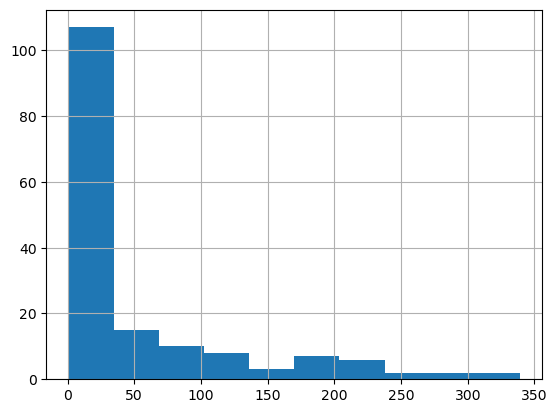

In [74]:
alcohol.hist();



In [75]:
#IQR
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.25

In [76]:
# min and max
alcohol.min()

1.0

In [77]:
alcohol.max()

339.0

In [78]:
#Standar Deviation
alcohol.std()

76.13491716376173

In [79]:
alcohol.var()

5796.52561153286

In [80]:
alcohol.std() ** 2 == alcohol.var()

True

## 46. The describe() Method

In [81]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [82]:
alcohol.describe(percentiles=[0.15,0.95,])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
15%        1.000000
50%       11.500000
95%      220.850000
max      339.000000
Name: wine_servings, dtype: float64

In [83]:
alcohol.describe(include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

## 47. mode() And value_counts()

In [84]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [85]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [86]:
alcohol[alcohol == 1].size

28

In [87]:
alcohol.value_counts()

wine_servings
1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: count, Length: 71, dtype: int64

In [88]:
alcohol.value_counts().iloc[0]

28

In [89]:
alcohol.value_counts(normalize=True)

wine_servings
1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: proportion, Length: 71, dtype: float64

## 48. idxmax() And idxmin()

In [90]:
alcohol.max()

339.0

In [91]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [92]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [93]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [94]:
alcohol.idxmax()

'Portugal'

In [95]:
alcohol.idxmin()

'Brunei'

In [96]:
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [97]:
alcohol[alcohol.idxmax()]

339.0

## 49. Sorting With sort_values()

In [98]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [99]:
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [100]:
alcohol.sort_values(ascending=False,na_position='first')

country
Afghanistan                 NaN
Bangladesh                  NaN
Bhutan                      NaN
Burundi                     NaN
North Korea                 NaN
                           ... 
Jordan                      1.0
Solomon Islands             1.0
Central African Republic    1.0
Haiti                       1.0
Chad                        1.0
Name: wine_servings, Length: 193, dtype: float64

In [101]:
alcohol.sort_values(ascending=False,na_position='last')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [102]:
alcohol.sort_values(ascending=False,na_position='last',kind='mergesort')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [103]:
alcohol.sort_values(ascending=False,na_position='last',kind='quicksort') #heapsort, mergesort

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [104]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [105]:
#reassignment or inplace

## 50. nlargest() And nsmallest()

In [106]:
alcohol.min()

1.0

In [107]:
alcohol.max()

339.0

In [108]:
alcohol.max()

339.0

In [109]:
alcohol.sort_values(ascending=False).head(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [110]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [111]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [112]:
alcohol.nsmallest(10)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Name: wine_servings, dtype: float64

## 51. Sorting With sort_index()

In [113]:
alcohol = alcohol.sort_values(ascending=False)

In [114]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [115]:
alcohol.sort_index()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [116]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [117]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [118]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True)

In [119]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

## 52. Skill Challenge

## 53. Solution

In [120]:
alcohol = pd.read_csv('drinks.csv', usecols=['country','wine_servings'], index_col='country')
alcohol = alcohol.squeeze()
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [121]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [122]:
fifty_plus = alcohol[alcohol > 50]
fifty_plus

country
Albania                54.0
Andorra               312.0
Argentina             221.0
Australia             212.0
Austria               191.0
Bahamas                51.0
Belgium               212.0
Bulgaria               94.0
Chile                 172.0
Cook Islands           74.0
Croatia               254.0
Cyprus                113.0
Czech Republic        134.0
Denmark               278.0
Equatorial Guinea     233.0
Estonia                59.0
Finland                97.0
Gabon                  59.0
Georgia               149.0
Germany               175.0
Greece                218.0
Hungary               185.0
Iceland                78.0
Ireland               165.0
Italy                 237.0
Laos                  123.0
Latvia                 62.0
Lithuania              56.0
Luxembourg            271.0
Montenegro            128.0
New Zealand           175.0
Norway                129.0
Paraguay               74.0
Poland                 56.0
Portugal              339.0
Romania     

In [123]:
fifty_plus.nsmallest(20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [124]:
fifty_plus.nsmallest(20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [125]:
fifty_plus.nsmallest(20).mean()

74.25

In [126]:
fifty_plus.nsmallest(20).median()

73.5

In [127]:
fifty_plus.nsmallest(20).std()

19.07292100831631

## 54. Series Arithmetics And fill_value()

In [128]:
alcohol + 2

country
Afghanistan      NaN
Albania         56.0
Algeria         16.0
Andorra        314.0
Angola          47.0
               ...  
Venezuela        5.0
Vietnam          3.0
Yemen            NaN
Zambia           6.0
Zimbabwe         6.0
Name: wine_servings, Length: 193, dtype: float64

In [129]:
(alcohol -10) * 2

country
Afghanistan      NaN
Albania         88.0
Algeria          8.0
Andorra        604.0
Angola          70.0
               ...  
Venezuela      -14.0
Vietnam        -18.0
Yemen            NaN
Zambia         -12.0
Zimbabwe       -12.0
Name: wine_servings, Length: 193, dtype: float64

In [130]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [131]:
alcohol.sort_index(inplace=True)

In [132]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [133]:
more_drinks = pd.Series({'Albania':6})

In [134]:
alcohol + more_drinks #only Albania had changed

Afghanistan     NaN
Albania        60.0
Algeria         NaN
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [135]:
more_drinks = pd.Series({'Albania':6,'Algeria':10,'Afghanistan':100,'Yemen':101})

In [136]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [137]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [138]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan   -100.0
Albania         48.0
Algeria          4.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

## 55. BONUS: Calculating Variance And Standard Deviation

In [139]:
alcohol.var()

5796.52561153286

In [140]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

5796.5256115328575

In [141]:
alcohol.std()

76.13491716376173

In [142]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2)

76.13491716376171

## 56. Cumulative Operations

In [143]:
#sum

In [144]:
alcohol.sum()

8221.0

In [145]:
alcohol.cumsum()

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [146]:
alcohol.cumsum(skipna=True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

## 57. Pairwise Differences With diff()

In [147]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [148]:
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [149]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

In [150]:
# a = v1
# b = v2
# c = v3

# periods = 1
# v2-v1
# v3-v2

# periods = -1
# v1-v2
# v2-v3

# periods = 2
# v3-v1
# v4-v2

## 58. Series iteration

In [151]:
mini_alc = alcohol[:10]

In [152]:
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [153]:
for i in mini_alc:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [154]:
for i in mini_alc.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [155]:
for i in mini_alc.index:
    print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [156]:
for i in mini_alc.items():
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


## 59. Filtering: filter(), where(), And mask()

In [157]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [158]:
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [159]:
alcohol[alcohol>200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [160]:
alcohol.loc[alcohol>200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [161]:
def gt200(x):
    return x > 200

In [162]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [163]:
#where methond
alcohol.where(lambda x: x>200, other='too small') #replacement method

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [164]:
#where methond
alcohol.where(lambda x: x>200)

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        312.0
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Name: wine_servings, Length: 193, dtype: float64

In [165]:
#where method
alcohol.where(lambda x: x>200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [166]:
#where method
alcohol.where(lambda x: x<=200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [167]:
#mask method
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

## 60. Transforming With update(), apply() And map(

In [168]:
#spot vs global transformation
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [169]:
alcohol.loc['Algeria'] = 19

In [170]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         19.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [171]:
alcohol.update(pd.Series(data=[200,20], index=['Albania','Algeria']))
alcohol.head()

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [172]:
#apply method
alcohol.apply(lambda x: x**2)


country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [173]:
alcohol.apply(np.square)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [174]:
def multiply(x):
    return x*x

In [175]:
alcohol.apply(multiply)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [179]:
def multiply_by_it_self_with_min(x, min_servings):
    if x < min_servings:
        return x**2
        
    return x

In [180]:
alcohol.apply(multiply_by_it_self_with_min, args=(200,))

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [181]:
alcohol.apply(multiply_by_it_self_with_min, min_servings=200)

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

## 61. Skill Challengue

## 62. Solution I - Reading Data

In [188]:
data = pd.read_csv('drinks.csv', usecols=['country','beer_servings'],index_col='country')
data = data.squeeze()
data.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

In [189]:
type(data)

pandas.core.series.Series

## 63. Solution II - Mean, Median, And Standard Deviation

In [190]:
data.mean()

102.87078651685393

In [191]:
data.median()

60.0

In [192]:
data.std()

100.64571267934778

In [193]:
data.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

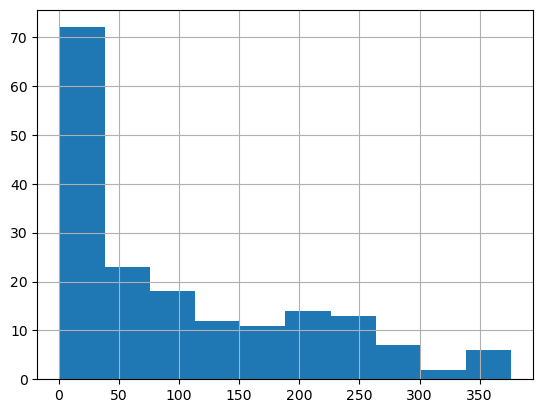

In [195]:
data.hist();

## 64. Solution III - Z-scores

In [196]:
data[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [197]:
data.mean()

102.87078651685393

In [198]:
data[:10] - data.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [199]:
(data[:10] - data.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [200]:
(data[:10] - data.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

beer_servings
high    6
low     4
Name: count, dtype: int64

In [201]:
(data - data.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

beer_servings
low     112
high     81
Name: count, dtype: int64

In [209]:
z_scores = (data - data.mean())/data.std()
z_scores.head(10)

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [210]:
z_scores.max()

2.7137689844109123

In [212]:
z_scores.abs().max()

2.7137689844109123

In [214]:
data.idxmax()

'Namibia'

In [216]:
data[data.idxmax()]

376.0